In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sn

In [83]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
#Importing test and train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [33]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
train.shape

(31962, 3)

In [35]:
train.columns

Index(['id', 'label', 'tweet'], dtype='object')

# **Removing hashtags**

In [36]:
def punc(df):
    df['tweet'] = df['tweet'].str.replace('[#]','')
    print(df)

In [37]:
punc(train)
punc(test)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for lyft credit i can't use...
2          3      0                                bihday your majesty
3          4      0  model   i love u take with u all the time in u...
4          5      0              factsguide: society now    motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user sikh temple vandalised in in calgary, ws...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]
          id                                              tweet
0      31963  studiolife aislife requires passion dedicati

/var/folders/dh/271ppfxd5rl8y5zk7k2k9gcc0000gn/T/ipykernel_8031/2434197307.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[#]','')
/var/folders/dh/271ppfxd5rl8y5zk7k2k9gcc0000gn/T/ipykernel_8031/2434197307.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[#]','')


# Tokenizing

In [38]:
import nltk
from nltk.tokenize import TweetTokenizer
def tokenizer(df):
    tknzr = TweetTokenizer(strip_handles=True)
    df['tweet']= df['tweet'].apply(lambda x: tknzr.tokenize(x))
    print(df)
    

In [39]:
tokenizer(train)
tokenizer(test)

          id  label                                              tweet
0          1      0  [when, a, father, is, dysfunctional, and, is, ...
1          2      0  [thanks, for, lyft, credit, i, can't, use, cau...
2          3      0                            [bihday, your, majesty]
3          4      0  [model, i, love, u, take, with, u, all, the, t...
4          5      0          [factsguide, :, society, now, motivation]
...      ...    ...                                                ...
31957  31958      0  [ate, isz, that, youuu, ?, ð, , , , ð, , ...
31958  31959      0  [to, see, nina, turner, on, the, airwaves, try...
31959  31960      0  [listening, to, sad, songs, on, a, monday, mor...
31960  31961      1  [sikh, temple, vandalised, in, in, calgary, ,,...
31961  31962      0                     [thank, you, for, you, follow]

[31962 rows x 3 columns]
          id                                              tweet
0      31963  [studiolife, aislife, requires, passion, ded

# Removing Stopwords

In [40]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words("english")
def stop_words(df):
    df['tweet']=df['tweet'].apply(lambda x: [i.lower() for i in x if i not in stop])
    print(df)

In [41]:
stop_words(train)
stop_words(test)

          id  label                                              tweet
0          1      0  [father, dysfunctional, selfish, drags, kids, ...
1          2      0  [thanks, lyft, credit, can't, use, cause, offe...
2          3      0                                  [bihday, majesty]
3          4      0  [model, love, u, take, u, time, urð, , , ±, ...
4          5      0               [factsguide, :, society, motivation]
...      ...    ...                                                ...
31957  31958      0  [ate, isz, youuu, ?, ð, , , , ð, , , , ð...
31958  31959      0  [see, nina, turner, airwaves, trying, wrap, ma...
31959  31960      0  [listening, sad, songs, monday, morning, otw, ...
31960  31961      1  [sikh, temple, vandalised, calgary, ,, wso, co...
31961  31962      0                                    [thank, follow]

[31962 rows x 3 columns]
          id                                              tweet
0      31963  [studiolife, aislife, requires, passion, ded

### Removing Punctuations and Words of length less than 3

In [42]:
import re
def clean_punc_len(df):
    df['tweet']=df['tweet'].apply(lambda x: [i for i in x if not re.match('[^\w\s]',i) and len(i)>3])

In [43]:
clean_punc_len(train)
clean_punc_len(test)

# Stemming

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishaansachdeva/nltk_data...


True

In [47]:
from nltk.stem import PorterStemmer
from textblob import Word
st = PorterStemmer()
def stemnlemm(df):
    df['tweet']=df['tweet'].apply(lambda x: [Word(st.stem(i)).lemmatize() for i in x])
    print(df)

In [48]:
stemnlemm(train)
stemnlemm(test)

          id  label                                              tweet
0          1      0   [father, dysfunct, selfish, drag, kid, dysfunct]
1          2      0  [thank, lyft, credit, can't, caus, offer, whee...
2          3      0                                  [bihday, majesti]
3          4      0                          [model, love, take, time]
4          5      0                        [factsguid, societi, motiv]
...      ...    ...                                                ...
31957  31958      0                                            [youuu]
31958  31959      0  [nina, turner, airwav, tri, wrap, mantl, genui...
31959  31960      0                 [listen, song, monday, morn, work]
31960  31961      1          [sikh, templ, vandalis, calgari, condemn]
31961  31962      0                                    [thank, follow]

[31962 rows x 3 columns]
          id                                              tweet
0      31963  [studiolif, aislif, requir, passion, dedic, 

# Vectorizing

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [50]:
train['tweet']=train['tweet'].apply(lambda x: " ".join(x) )
test['tweet']=test['tweet'].apply(lambda x: " ".join(x) )

X_train = cv.fit_transform(train['tweet'])

In [56]:
print(X_train)

  (0, 465)	1
  (0, 721)	1
  (1, 1331)	1
  (1, 198)	1
  (1, 212)	1
  (1, 922)	1
  (2, 132)	1
  (3, 865)	1
  (3, 797)	1
  (3, 1305)	1
  (3, 1350)	1
  (4, 1220)	1
  (4, 874)	1
  (5, 650)	1
  (5, 1308)	1
  (5, 755)	1
  (6, 196)	1
  (6, 1358)	1
  (7, 198)	1
  (7, 904)	1
  (7, 1144)	2
  (7, 1491)	2
  (7, 433)	2
  (7, 1340)	1
  (7, 609)	1
  :	:
  (31955, 1444)	1
  (31955, 748)	1
  (31956, 1350)	1
  (31956, 1358)	1
  (31956, 1491)	1
  (31956, 1422)	1
  (31956, 489)	1
  (31956, 490)	1
  (31958, 773)	1
  (31958, 1177)	1
  (31958, 1378)	1
  (31958, 628)	1
  (31958, 546)	1
  (31959, 867)	1
  (31959, 872)	1
  (31959, 1475)	1
  (31959, 1226)	1
  (31959, 778)	1
  (31960, 281)	1
  (31960, 1321)	1
  (31960, 1194)	1
  (31960, 1407)	1
  (31960, 191)	1
  (31961, 1331)	1
  (31961, 502)	1


In [53]:
Y_train=pd.DataFrame(train['label'])
Y_train.head()

,label
0,0
1,0
2,0
3,0
4,0


### Testing and Training Split

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

# Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import MultinomialNB
z=MultinomialNB()
z.fit(x_train,y_train)

pred=z.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[8705  184]
 [ 281  419]]
The Accurracy score for Naive Bayes Classifier is:  0.9515069350297215


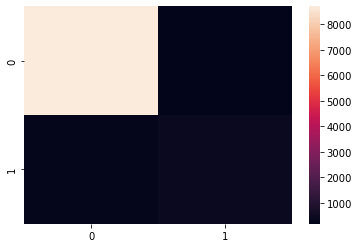

In [70]:
cm=confusion_matrix(y_test,pred)
sn.heatmap(cm)
print(cm)
score = accuracy_score( y_test, pred)
print('The Accurracy score for Naive Bayes Classifier is: ',score)


# K-neighbor Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

#predicting test results
pred = classifier.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[8705  184]
 [ 281  419]]
The Accurracy score for K-Neighbors Classifier is: 0.9515069350297215


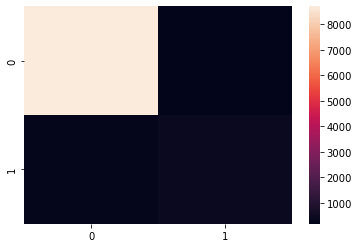

In [72]:
cm=confusion_matrix(y_test,pred)
print(cm)
sn.heatmap(cm)
score = accuracy_score( y_test, pred)
print('The Accurracy score for K-Neighbors Classifier is:',score)

# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators=100 ,criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

#predicting test results
pred = classifier.predict(x_test)

/var/folders/dh/271ppfxd5rl8y5zk7k2k9gcc0000gn/T/ipykernel_8031/3779070556.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


[[8705  184]
 [ 281  419]]
Accuracy Score for Random Forest Classifier is: 0.9515069350297215


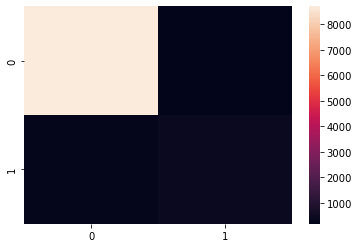

In [75]:
cm=confusion_matrix(y_test,pred)
print(cm)
sn.heatmap(cm)
score = accuracy_score( y_test, pred)
print('Accuracy Score for Random Forest Classifier is:',score)


# Logistic Regression Classifier

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#predicting test results
y_pred = classifier.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
cm=confusion_matrix(y_test,pred)
print(cm)
score = accuracy_score( y_test, pred)
print('Accuracy score for Logistic Regression Classifier is: ',score)

[[8705  184]
 [ 281  419]]
Accuracy score for Logistic Regression Classifier is:  0.9515069350297215


# XG Boost Classifier

In [84]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [85]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
score = accuracy_score( y_test, y_pred)
print('Accuracy score for XGBoost Classifer is:',score)

[[8847   42]
 [ 426  274]]
Accuracy score for XGBoost Classifer is: 0.9511940765460424


# Support Vector Machine Classifier

In [86]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[8869   20]
 [ 441  259]]
Accuracy score for SVM Classifier is: 0.9519240796746272


<AxesSubplot:>

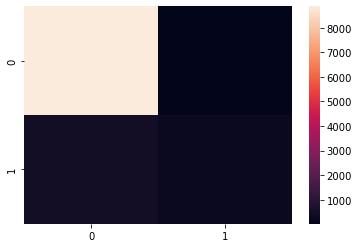

In [89]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
score = accuracy_score( y_test, y_pred)
print('Accuracy score for SVM Classifier is:',score)
sn.heatmap(cm)